# Task 1: Exploratory Data Analysis

In [706]:
# Problem: Developing a machine learning model that can predict whether people have diabetes when their characteristics are specified.
# is requested. You are expected to perform the necessary data analysis and feature engineering steps before developing the model.

# The dataset is part of the large dataset held at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA.
# Pima Indian women aged 21 and over living in Phoenix, the 5th largest city in the State of Arizona in the USA
#Data used for diabetes research on #. It consists of 768 observations and 8 numerical independent variables.
# The target variable is specified as "outcome"; 1 indicates positive diabetes test result, 0 indicates negative.

# Pregnancies: Number of pregnancies
# Glucose: Glucose
# BloodPressure: Blood pressure (Diastolic(Small Blood Pressure))
# SkinThickness: Skin Thickness
# Insulin: Insulin.
# BMI: Body mass index.
# DiabetesPedigreeFunction: A function that calculates our probability of having diabetes based on our ancestry.
# Age: Age (years)
# Outcome: Information whether the person has diabetes or not. Have the disease (1) or not (0)

## Step 1: Examine the overall picture.

In [707]:
import missingno as missingno
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [708]:
def load_application_train():
    data = pd.read_csv("diabetes.csv")
    return data

In [709]:
df = load_application_train()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [710]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [711]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [712]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [713]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [714]:
df.shape

(768, 9)

In [715]:
df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.00,0.0,0.0,0.0,0.00,0.0,0.000,0.07800,21.0,0.0
0.05,0.0,79.0,38.7,0.00,0.0,21.800,0.14035,21.0,0.0
0.50,3.0,117.0,72.0,23.00,30.5,32.000,0.37250,29.0,0.0
0.95,10.0,181.0,90.0,44.00,293.0,44.395,1.13285,58.0,1.0
0.99,13.0,196.0,106.0,51.33,519.9,50.759,1.69833,67.0,1.0
1.00,17.0,199.0,122.0,99.00,846.0,67.100,2.42000,81.0,1.0


## Step 2: Capture the numeric and categorical variables.

In [716]:
def grab_col_names(dataframe, categorical_threshold = 10, cardinal_threshold = 20):
    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    
    numeric_looking_but_categorical = [col for col in dataframe.columns if dataframe[col].dtype != "O" and dataframe[col].nunique() < categorical_threshold]
    
    categorical_looking_but_cardinal = [col for col in dataframe.columns  if dataframe[col].dtype == "O" and dataframe[col].nunique() > cardinal_threshold]
    
    categorical_cols = categorical_cols + numeric_looking_but_categorical
    
    categorical_cols = [col for col in categorical_cols if col not in categorical_looking_but_cardinal]
    
    numeric_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    
    numeric_cols = [col for col in numeric_cols if col not in numeric_looking_but_categorical]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"Categorical Columns: {len(categorical_cols)}")
    print(f"Numeric Columns: {len(numeric_cols)}")
    print(f"Categorical Looking but Cardinal: {len(categorical_looking_but_cardinal)}")
    print(f"Numeric Looking but Categorical: {len(numeric_looking_but_categorical)}")
    return categorical_cols, numeric_cols, categorical_looking_but_cardinal
    

In [717]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
Categorical Columns: 1
Numeric Columns: 8
Categorical Looking but Cardinal: 0
Numeric Looking but Categorical: 1


## Step 3: Analyze the numerical and categorical variables.

In [718]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [719]:
cat_cols

['Outcome']

In [720]:
cat_but_car

[]

In [721]:
def categorical_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                       "Ratio" : dataframe[col_name].value_counts()/ len(dataframe)}))
    
    if plot: 
        sns.countplot(x = dataframe[col_name], data = dataframe)

   Outcome     Ratio
0      500  0.651042
1      268  0.348958


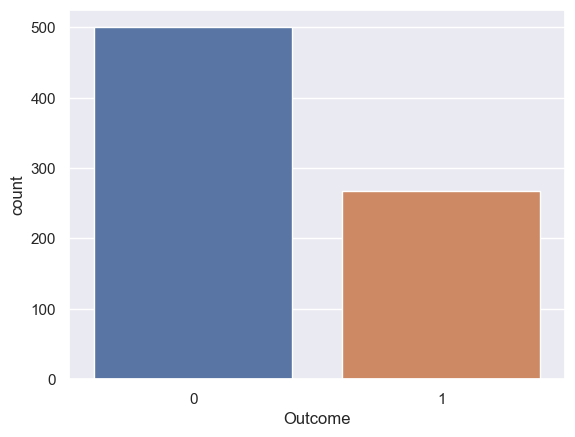

In [722]:
categorical_summary(df,"Outcome",True)

In [723]:
def numerical_summary(dataframe, col_name, plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)
    
    if plot:
        dataframe[col_name].hist(bins = 20)
        plt.title(col_name)
        plt.xlabel(col_name)
        plt.show()
    
    

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
max       17.000000
Name: Pregnancies, dtype: float64


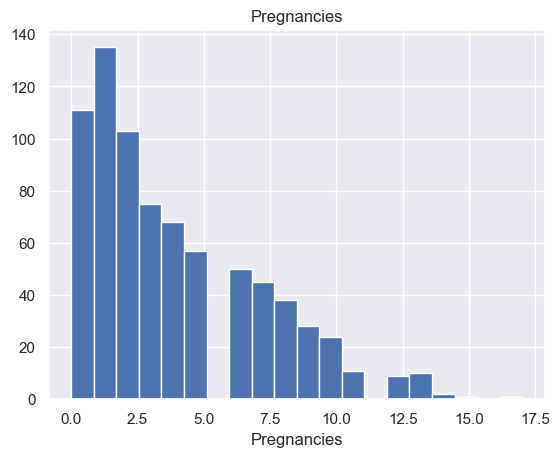

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
5%        79.000000
10%       85.000000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      134.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
max      199.000000
Name: Glucose, dtype: float64


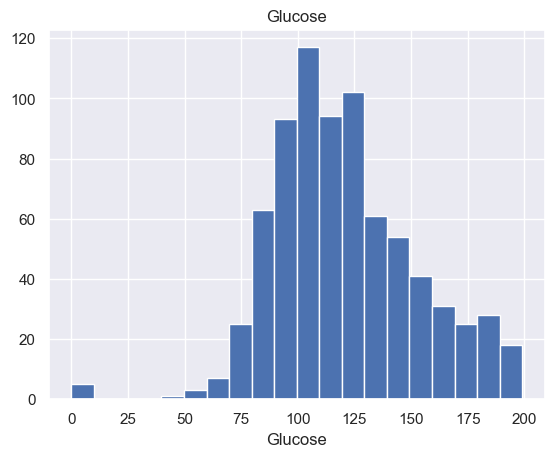

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
5%        38.700000
10%       54.000000
20%       60.000000
30%       64.000000
40%       68.000000
50%       72.000000
60%       74.000000
70%       78.000000
80%       82.000000
90%       88.000000
95%       90.000000
99%      106.000000
max      122.000000
Name: BloodPressure, dtype: float64


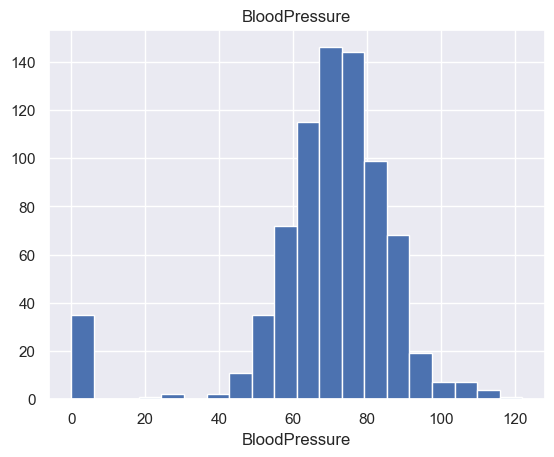

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        8.200000
40%       18.000000
50%       23.000000
60%       27.000000
70%       31.000000
80%       35.000000
90%       40.000000
95%       44.000000
99%       51.330000
max       99.000000
Name: SkinThickness, dtype: float64


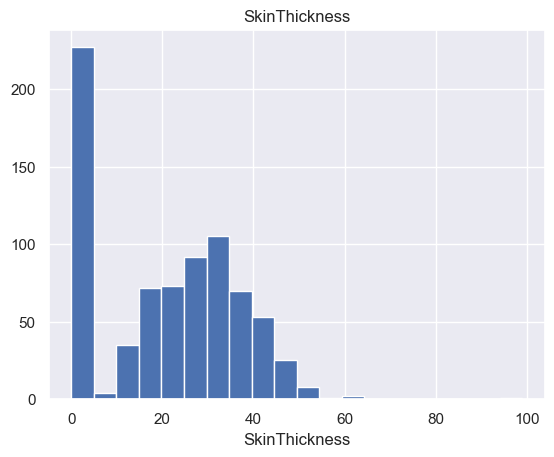

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%       30.500000
60%       72.200000
70%      106.000000
80%      150.000000
90%      210.000000
95%      293.000000
99%      519.900000
max      846.000000
Name: Insulin, dtype: float64


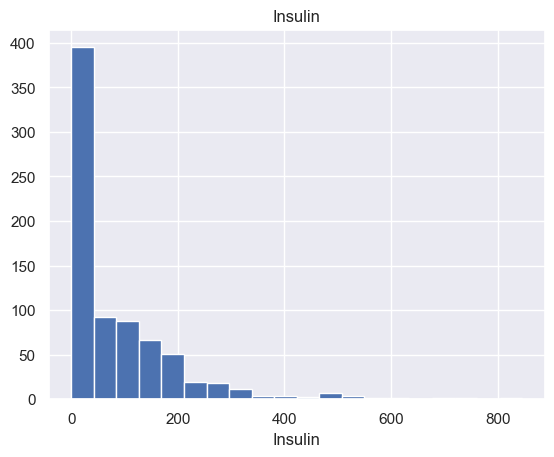

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
5%        21.800000
10%       23.600000
20%       25.900000
30%       28.200000
40%       30.100000
50%       32.000000
60%       33.700000
70%       35.490000
80%       37.800000
90%       41.500000
95%       44.395000
99%       50.759000
max       67.100000
Name: BMI, dtype: float64


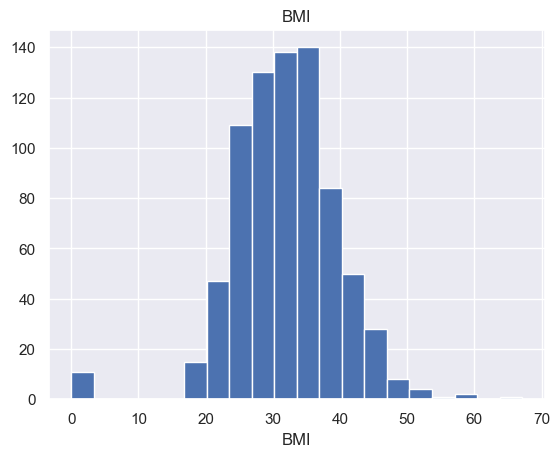

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
5%         0.140350
10%        0.165000
20%        0.219400
30%        0.259000
40%        0.302800
50%        0.372500
60%        0.454200
70%        0.563700
80%        0.687000
90%        0.878600
95%        1.132850
99%        1.698330
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


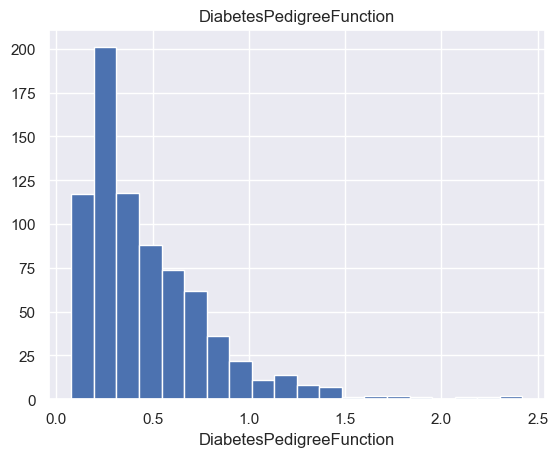

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
5%        21.000000
10%       22.000000
20%       23.000000
30%       25.000000
40%       27.000000
50%       29.000000
60%       33.000000
70%       38.000000
80%       42.600000
90%       51.000000
95%       58.000000
99%       67.000000
max       81.000000
Name: Age, dtype: float64


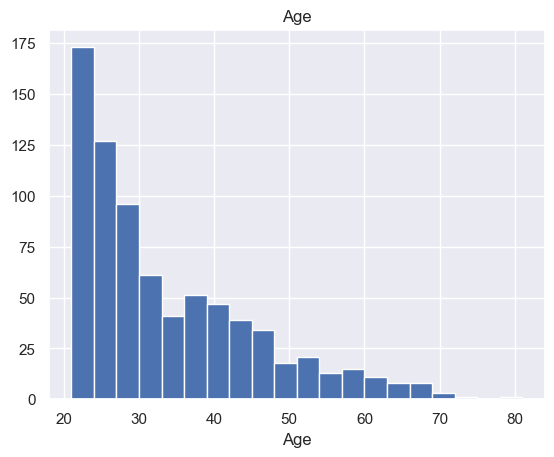

In [724]:
for col in num_cols:
    numerical_summary(df,col,True)

## Step 4: Perform target variable analysis. (The mean of the target variable according to the categorical variables,mean of numerical variables)


In [725]:
def target_summary_with_num(dataframe, target, col_name):
    print(dataframe.groupby(target).agg({col_name : "mean"}))
    

In [726]:
for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672
            Glucose
Outcome            
0        109.980000
1        141.257463
         BloodPressure
Outcome               
0            68.184000
1            70.824627
         SkinThickness
Outcome               
0            19.664000
1            22.164179
            Insulin
Outcome            
0         68.792000
1        100.335821
               BMI
Outcome           
0        30.304200
1        35.142537
         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500
               Age
Outcome           
0        31.190000
1        37.067164


## Step 5: Analyze outliers.

In [727]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    
    interquartile = quartile3 - quartile1
    up = quartile3 + 1.5 * interquartile 
    low = quartile1 - 1.5 * interquartile
    return low, up
    
    


In [728]:
outlier_thresholds(df, "Insulin")

(-190.875, 318.125)

In [729]:
def check_outlier(dataframe, col_name):
    low, up = outlier_thresholds(dataframe, col_name,0.05,0.95)
    
    if dataframe[(dataframe[col_name] > up) | (dataframe[col_name] < low)].any(axis= None):
        return True
    else:
        return False
    
    

In [730]:
check_outlier(df, "SkinThickness")


False

In [731]:
for col in df.columns:
    print(col,check_outlier(df, col) )

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


In [732]:
def replace_with_thresholds(dataframe, variable):
    low, up = outlier_thresholds(dataframe, variable, 0.05, 0.95)
    dataframe.loc[(df[variable] < low), variable] = low
    dataframe.loc[(df[variable] < up), variable] = up

In [733]:
for col in df.columns:
    print(col, check_outlier(df,col))
    if check_outlier(df,col):
        replace_with_thresholds(df,col)

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


## Step 6: Perform missing observation analysis.

In [734]:
df.isnull().values.any()

False

In [735]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [736]:
df.isnull().sum().sum()

0

In [737]:
df.notnull().sum()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [738]:
df[df.isnull().any(axis = 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [739]:
df[df.notnull().any(axis = 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,732.5,33.6,0.627,50,1
1,1,85,66,29,732.5,26.6,0.351,31,0
2,8,183,64,0,732.5,23.3,0.672,32,1
3,1,89,66,23,732.5,28.1,0.167,21,0
4,0,137,40,35,732.5,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,732.5,32.9,0.171,63,0
764,2,122,70,27,732.5,36.8,0.340,27,0
765,5,121,72,23,732.5,26.2,0.245,30,0
766,1,126,60,0,732.5,30.1,0.349,47,1


In [740]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [741]:
(df.isnull().sum()/df.shape[0] * 100).sort_values(ascending=False)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [742]:
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

In [743]:
na_cols

[]

In [744]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    missing_df = pd.concat([n_miss,ratio], axis = 1, keys = ["n_miss","ratio"])
    print(missing_df, end="\n")
    
    if na_name:
        return na_columns
    

In [745]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [746]:
missing_values_table(df, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

## Step 7: Perform correlation analysis. 

In [747]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.030188,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.085253,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,-0.016744,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.009768,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.030188,0.085253,-0.016744,0.009768,1.000000,-0.006455,0.012402,0.078054,0.046410
BMI,0.017683,0.221071,0.281805,0.392573,-0.006455,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.012402,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,0.078054,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.046410,0.292695,0.173844,0.238356,1.000000


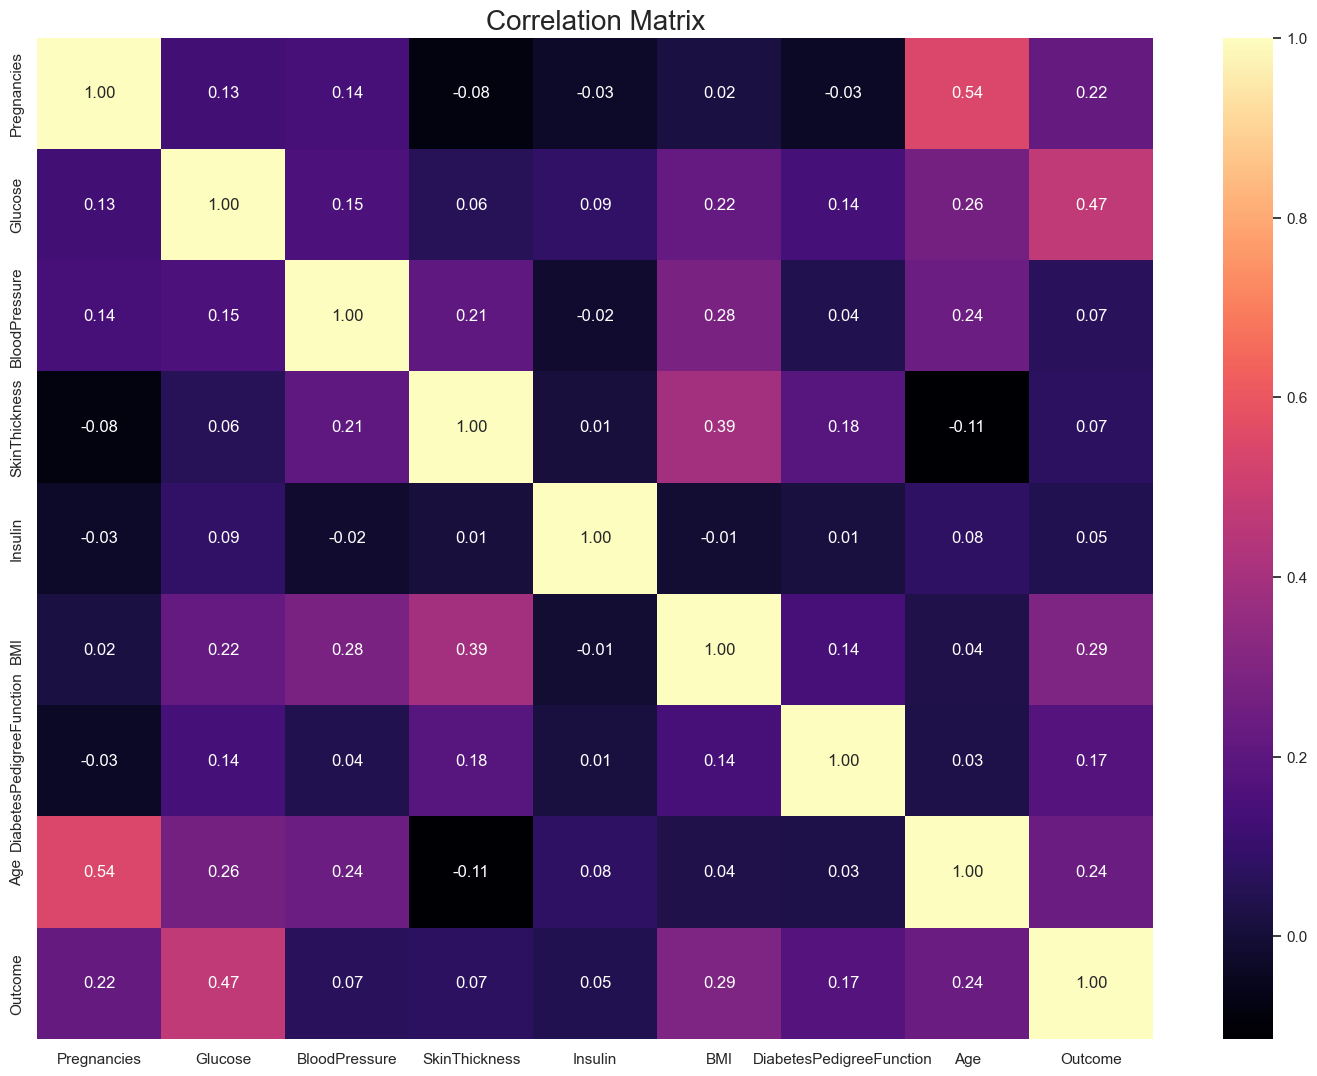

In [748]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show(block=True)

## Base Model


In [750]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)




In [751]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.78
Recall: 0.725
Precision: 0.62
F1: 0.67
Auc: 0.77


# Task 2: Feature Engineering

## Step 1: Take necessary actions for missing and outlier values. There are no missing observations in the data set, but Glucose, Insulin etc. Observation units containing a value of 0 in the variables may represent the missing value. For example; a person's glucose or insulin value will not be 0. Considering this situation, you can assign the zero values to the relevant values as NaN and then apply the operations to the missing values.

In [752]:
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Outcome", "Pregnancies"])]

In [753]:
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

In [754]:
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [755]:
na_columns = missing_values_table(df, True)

               n_miss      ratio
SkinThickness     227  29.557292
BloodPressure      35   4.557292
BMI                11   1.432292
Glucose             5   0.651042


In [756]:
na_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

### Advanced Analytics

<AxesSubplot:>

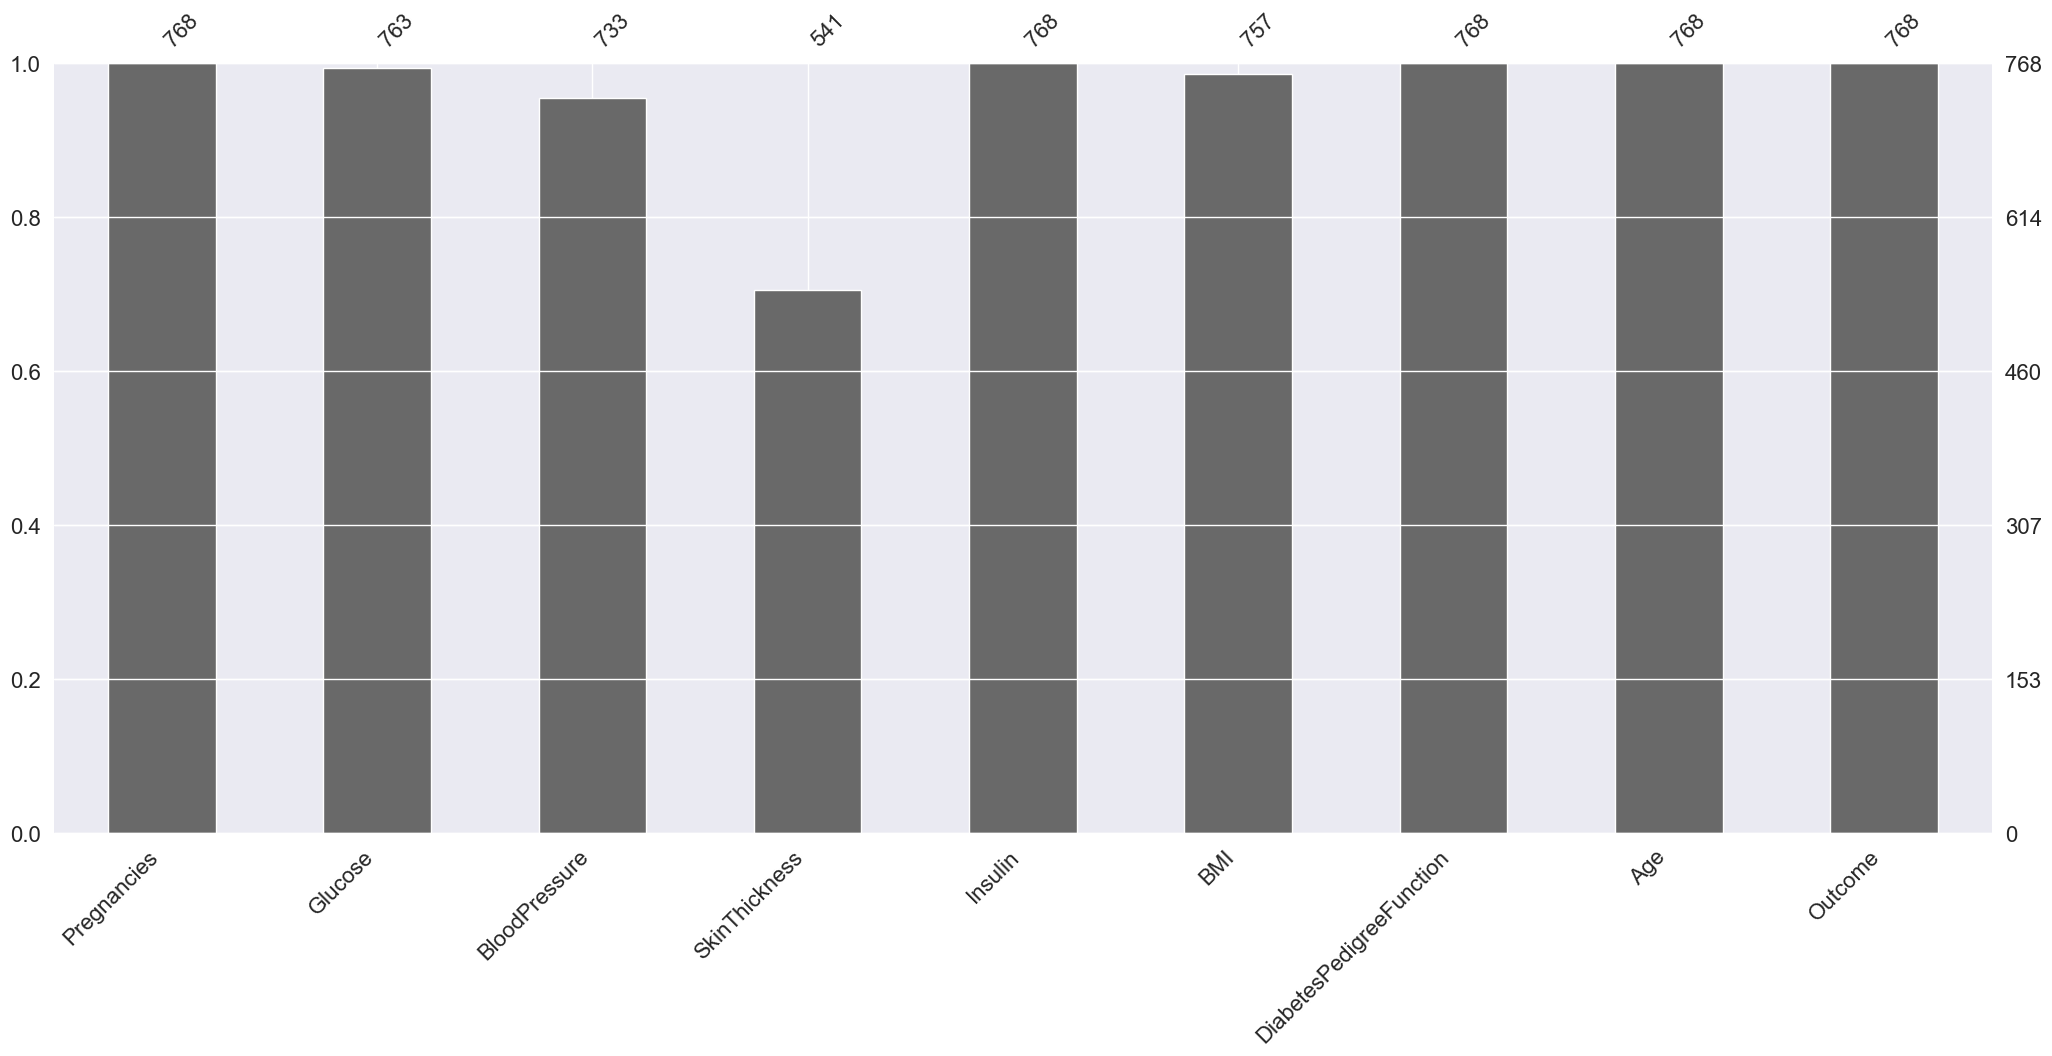

In [757]:
msno.bar(df)

<AxesSubplot:>

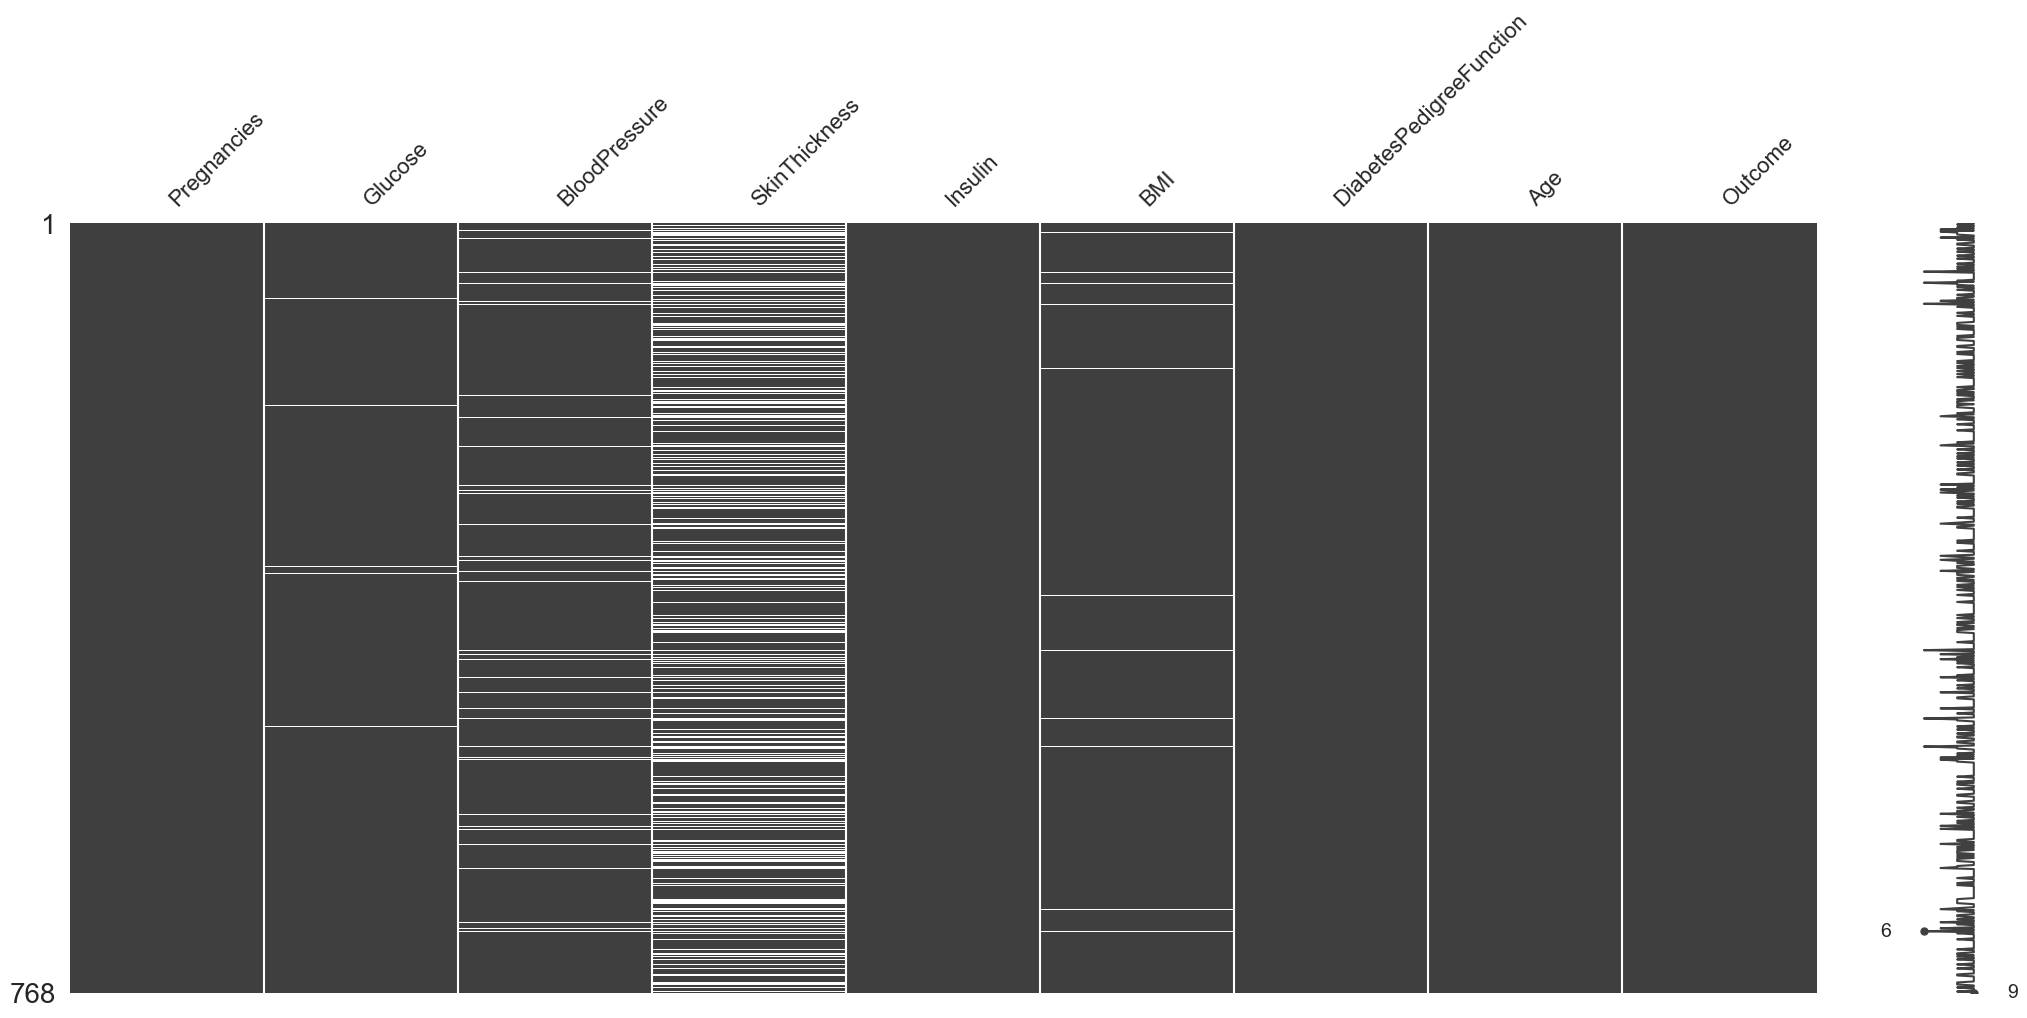

In [758]:
msno.matrix(df)

<AxesSubplot:>

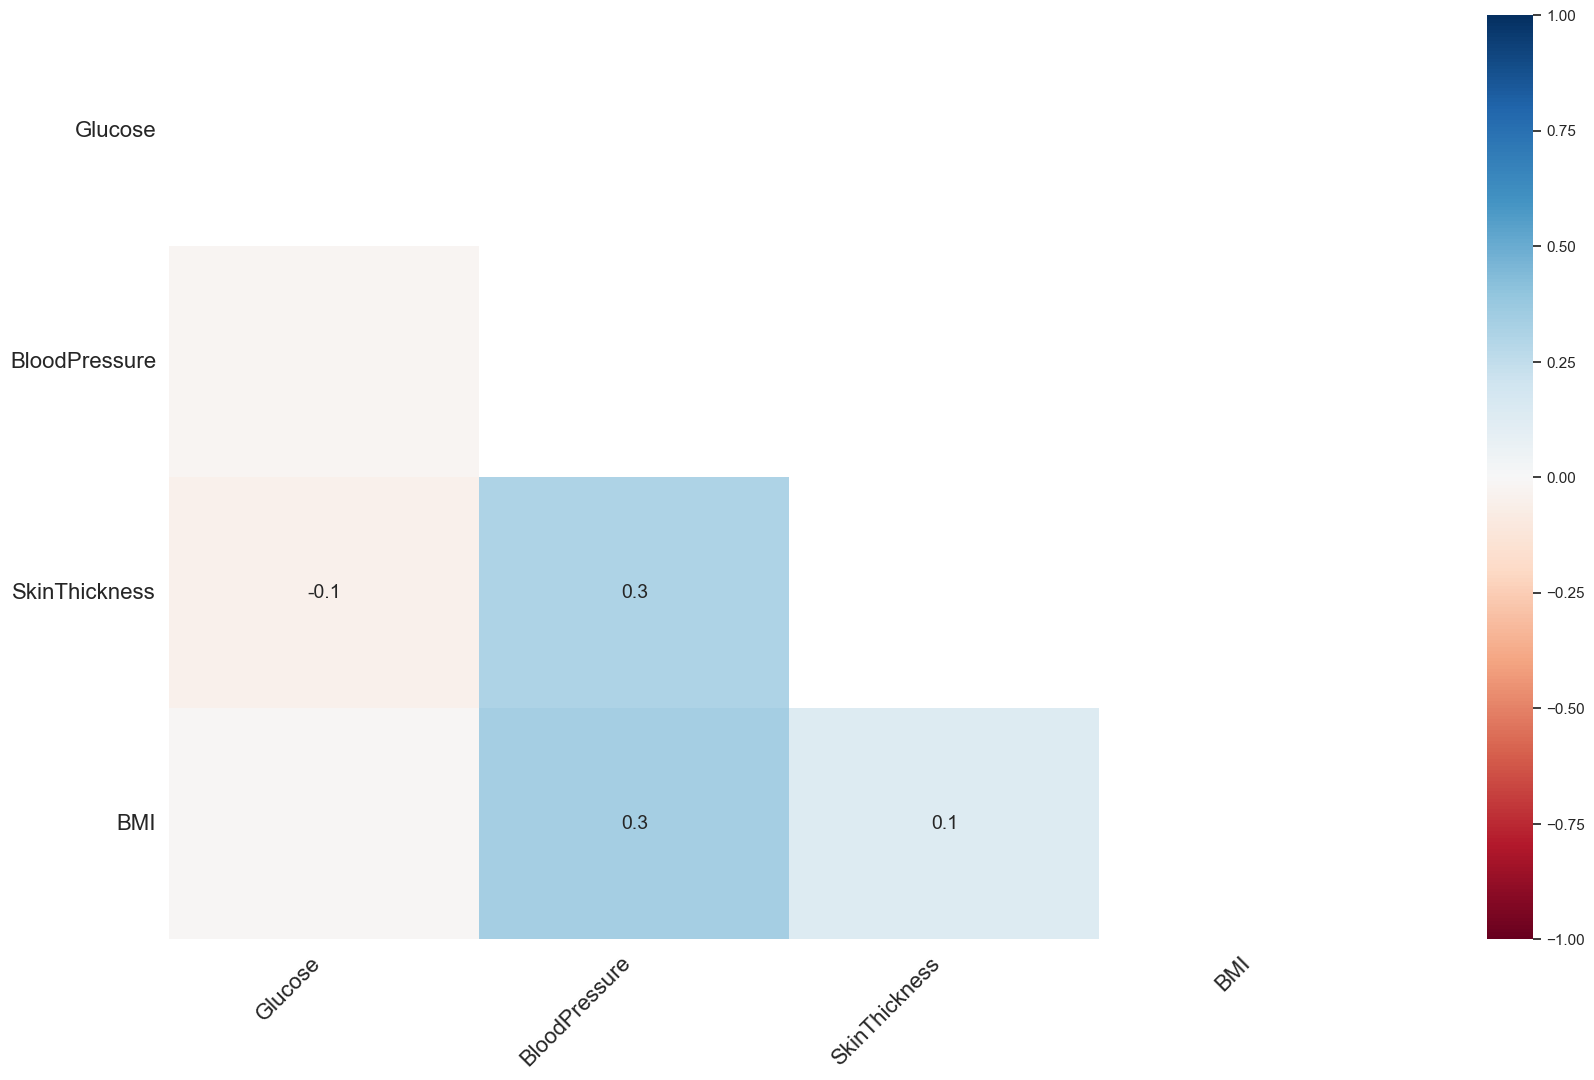

In [759]:
msno.heatmap(df)

### Examining the Relationship of Missing Values with the Dependent Variable

In [760]:
missing_values_table(df, True)

               n_miss      ratio
SkinThickness     227  29.557292
BloodPressure      35   4.557292
BMI                11   1.432292
Glucose             5   0.651042


['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

In [761]:
na_cols = missing_values_table(df, True)

               n_miss      ratio
SkinThickness     227  29.557292
BloodPressure      35   4.557292
BMI                11   1.432292
Glucose             5   0.651042


### Examining the Relationship of Missing Values with the Dependent Variable

In [762]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isnull(),1,0)
        
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                           "Count" : temp_df.groupby(col)[target].count()}))

In [763]:
missing_vs_target(df, "Outcome", na_columns)

                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                   0.348624    763
1                   0.400000      5
                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                         0.343793    733
1                         0.457143     35
                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                         0.332717    541
1                         0.387665    227
             TARGET_MEAN  Count
BMI_NA_FLAG                    
0               0.351387    757
1               0.181818     11


In [764]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Filling in Missing Values

In [765]:
for col in zero_columns:
    df.loc[df[col].isnull(), col] = df[col].median()

In [766]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Step 2: Create new variables.

In [767]:
df.loc[(df["Age"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[(df["Age"] >= 18) & (df["Age"] < 56), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] > 56), "NEW_AGE_CAT"] = "senior"

In [768]:

df["NEW_BMI"] = pd.cut(x= df["BMI"], bins = [0, 18.5, 24.9, 29.9, 100], labels = ["Underweight", "Healthy", "Overweight", "Obese"])

In [769]:
df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])

In [770]:
df.loc[(df["Age"] < 18) & (df["BMI"] < 18.5), "NEW_AGE_BMI"] = "youngUnderweight"
df.loc[(df["Age"] < 18) & (df["BMI"] >= 18.5) & (df["BMI"] < 24.9), "NEW_AGE_BMI"] = "youngHealthy"
df.loc[(df["Age"] < 18) & (df["BMI"] >= 24.9) & (df["BMI"] < 29.9), "NEW_AGE_BMI"] = "youngOverweight"
df.loc[(df["Age"] < 18) & (df["BMI"] >= 29.9) & (df["BMI"] < 100), "NEW_AGE_BMI"] = "youngObese"

In [771]:
df.loc[(df["Age"] >= 18) & (df["Age"] < 56) &(df["BMI"] < 18.5), "NEW_AGE_BMI"] = "matureUnderweight"
df.loc[(df["Age"] >= 18) & (df["Age"] < 56) &(df["BMI"] >= 18.5) & (df["BMI"] < 24.9), "NEW_AGE_BMI"] = "matureHealthy"
df.loc[(df["Age"] >= 18) & (df["Age"] < 56) &(df["BMI"] >= 24.9) & (df["BMI"] < 29.9), "NEW_AGE_BMI"] = "matureOverweight"
df.loc[(df["Age"] >= 18) & (df["Age"] < 56) &(df["BMI"] >= 29.9) & (df["BMI"] < 100), "NEW_AGE_BMI"] = "matureObese"

In [772]:
df.loc[(df["Age"] > 56) & (df["BMI"] < 18.5), "NEW_AGE_BMI"] = "seniorUnderweight"
df.loc[(df["Age"] > 56) & (df["BMI"] >= 18.5) & (df["BMI"] < 24.9), "NEW_AGE_BMI"] = "seniorHealthy"
df.loc[(df["Age"] > 56) & (df["BMI"] >= 24.9) & (df["BMI"] < 29.9), "NEW_AGE_BMI"] = "seniorOverweight"
df.loc[(df["Age"] > 56) & (df["BMI"] >= 29.9) & (df["BMI"] < 100), "NEW_AGE_BMI"] = "seniorObese"

In [773]:
df["NEW_GLUCOSE*PREGNANCIES"] = df["Glucose"] * df["Pregnancies"]

In [774]:






# Yaş ve Glikoz değerlerini bir arada düşünerek kategorik değişken oluşturma
df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 18) & (df["Age"] < 56)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["Glucose"] < 70) & (df["Age"] >= 56), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[(df["Glucose"] < 70) & (df["Age"] < 18), "NEW_AGE_GLUCOSE_NOM"] = "lowyoung"

df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 18) & (df["Age"] < 56)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 56), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] < 18), "NEW_AGE_GLUCOSE_NOM"] = "normalyoung"

df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & ((df["Age"] >= 18) & (df["Age"] < 56)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] >= 56), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] < 18), "NEW_AGE_GLUCOSE_NOM"] = "hiddenyoung"


df.loc[(df["Glucose"] > 125) & ((df["Age"] >= 18) & (df["Age"] < 56)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["Glucose"] > 125) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"
df.loc[(df["Glucose"] > 125) & (df["Age"] < 18), "NEW_AGE_GLUCOSE_NOM"] = "highyoung"






In [775]:
def set_insulin(dataframe, col_name = "Insulin"):
    if 16 <= dataframe[col_name] <= 166:
        return "Normal"
    else : 
        return "Anormal"

In [776]:
df["NEW_INSULIN_SCORE"] = df.apply(set_insulin, axis = 1)

In [777]:
df["NEW_GLUCOSE*INSULIN"] = df["Glucose"] * df["Insulin"]

In [778]:
temp_temp = df

In [779]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI,NEW_GLUCOSE*PREGNANCIES,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN
0,6,148.0,72.0,35.0,732.5,33.6,0.627,50,1,mature,Obese,Prediabetes,matureObese,888.0,highsenior,Anormal,108410.0
1,1,85.0,66.0,29.0,732.5,26.6,0.351,31,0,mature,Overweight,Normal,matureOverweight,85.0,normalmature,Anormal,62262.5
2,8,183.0,64.0,29.0,732.5,23.3,0.672,32,1,mature,Healthy,Prediabetes,matureHealthy,1464.0,highmature,Anormal,134047.5
3,1,89.0,66.0,23.0,732.5,28.1,0.167,21,0,mature,Overweight,Normal,matureOverweight,89.0,normalmature,Anormal,65192.5
4,0,137.0,40.0,35.0,732.5,43.1,2.288,33,1,mature,Obese,Normal,matureObese,0.0,highmature,Anormal,100352.5


## Step 3: Perform the encoding operations.

### label enconding

In [780]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [781]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

In [782]:
binary_cols

['Outcome', 'NEW_AGE_CAT', 'NEW_GLUCOSE']

In [783]:
for col in binary_cols:
    label_encoder(df, col)

In [784]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI,NEW_GLUCOSE*PREGNANCIES,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN
0,6,148.0,72.0,35.0,732.5,33.6,0.627,50,1,0,Obese,1,matureObese,888.0,highsenior,Anormal,108410.0
1,1,85.0,66.0,29.0,732.5,26.6,0.351,31,0,0,Overweight,0,matureOverweight,85.0,normalmature,Anormal,62262.5
2,8,183.0,64.0,29.0,732.5,23.3,0.672,32,1,0,Healthy,1,matureHealthy,1464.0,highmature,Anormal,134047.5
3,1,89.0,66.0,23.0,732.5,28.1,0.167,21,0,0,Overweight,0,matureOverweight,89.0,normalmature,Anormal,65192.5
4,0,137.0,40.0,35.0,732.5,43.1,2.288,33,1,0,Obese,0,matureObese,0.0,highmature,Anormal,100352.5


### one hot encoding

In [785]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 17
Categorical Columns: 8
Numeric Columns: 9
Categorical Looking but Cardinal: 0
Numeric Looking but Categorical: 5


In [786]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

    

In [787]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]

In [788]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [789]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_GLUCOSE,...,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,Insulin_744.0,Insulin_846.0,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese
0,6,148.0,72.0,35.0,33.6,0.627,50,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,89.0,66.0,23.0,28.1,0.167,21,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Step 4: Standardize for numeric variables.

In [790]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [791]:
df[num_cols].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,NEW_GLUCOSE*PREGNANCIES,NEW_GLUCOSE*INSULIN
0,0.639947,0.866045,-0.031990,0.670643,0.166619,0.468492,1.425995,0.881806,0.861467
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.852200,-0.365061,-0.190672,-0.857578,-1.201998
2,1.233880,2.016662,-0.693761,-0.012301,-1.332500,0.604397,-0.105584,2.129484,2.007836
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.633881,-0.920763,-1.041549,-0.848914,-1.070984
4,-1.141852,0.504422,-2.679076,0.670643,1.549303,5.484909,-0.020496,-1.041698,0.501179


## Step 5: Build the model.

In [792]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)

In [793]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=17)

In [794]:
from sklearn.ensemble import RandomForestClassifier

In [795]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [796]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.78
Recall: 0.703
Precision: 0.64
F1: 0.67
Auc: 0.76


## FEATURE IMPORTANCE

In [797]:
def plot_importance(model, features, num = len(X), save = False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_,
                               "Feature" : features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y ="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending = False)[0:num])
    
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

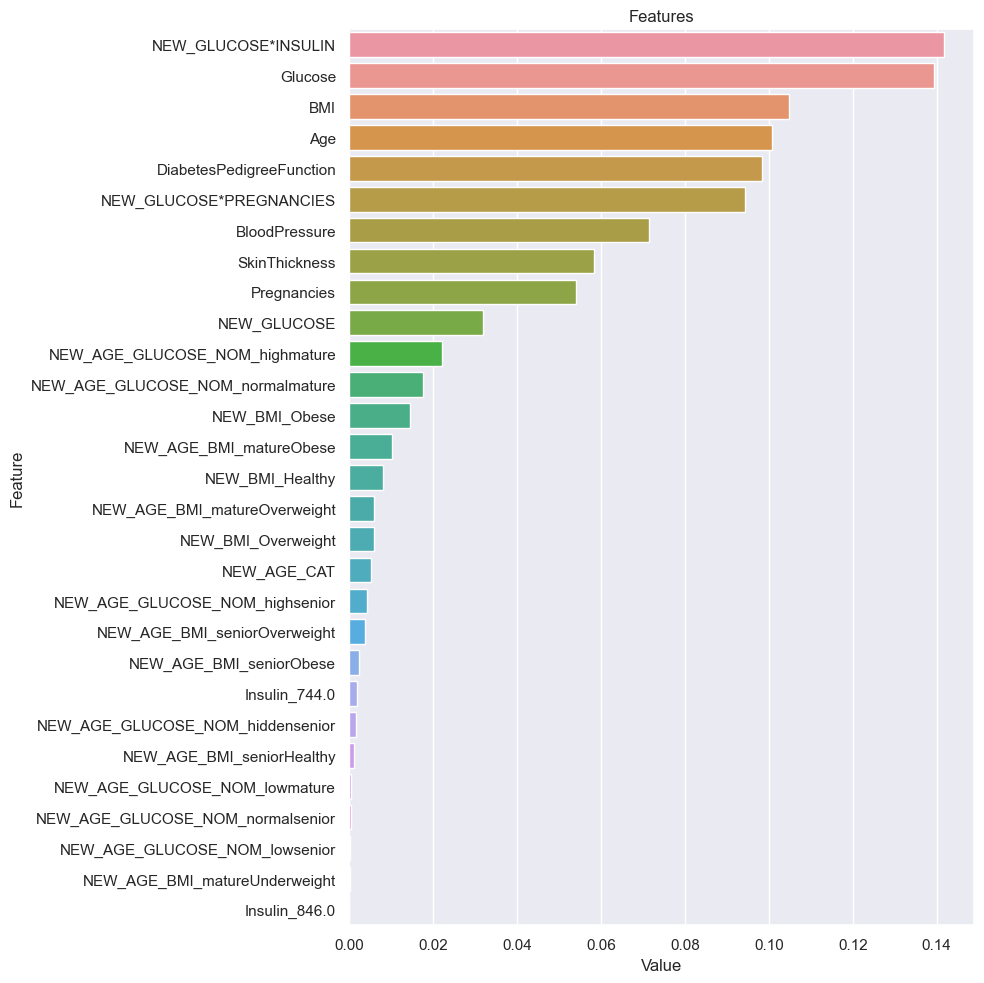

In [798]:
plot_importance(rf_model, X_train)